# Reto Empleados 
## <b> Objetivo  </b>
1. <b> Evaluar:   </b> las características de un conjunto de datos con el fin de ver si son suficientes para la actividad en la que serán usados. 
2. <b> Crear: </b> nuevas características a partir de las existentes, que logren proporcionar una mayor información para la actividad en la que se usarán. 
3. <b> Eliminar: </b> las características que sean irrelevantes para el uso que se le dará al conjunto de datos.


## Bibliotecas  

In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy as stats 

## Leer archivo csv 

In [7]:
EmpleadosAttrition = pd.read_csv('EmpleadosRETO.csv')
EmpleadosAttrition.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,Attrition
0,50,Travel_Rarely,Research & Development,1 km,2,Medical,1,997,4,Male,...,22,4,3,80,32,1,2,4,1,No
1,36,Travel_Rarely,Research & Development,6 km,2,Medical,1,178,2,Male,...,20,4,4,80,7,0,3,2,0,No
2,21,Travel_Rarely,Sales,7 km,1,Marketing,1,1780,2,Male,...,13,3,2,80,1,3,3,0,1,Yes
3,52,Travel_Rarely,Research & Development,7 km,4,Life Sciences,1,1118,2,Male,...,19,3,4,80,18,4,3,6,4,No
4,33,Travel_Rarely,Research & Development,15 km,1,Medical,1,582,2,Male,...,12,3,4,80,15,2,4,6,7,Yes


## <b> EDA sobre `EmpleadosAttrition` </b>

### <b> Objetivo: </b> : Eliminar las columna que con alta probabilidad (Estimada por mi) no tienen relación alguna con la salida 

1. Dentro de las instrucciones se mencionan que hay columnas que no aportan absolutamente nada a definir el desgaste de un empleado: Esas son las primeras que eliminaremos: 

  - `EmployeeCount`: número de empleados, todos tienen un 1
  - `EmployeeNumber`: ID del empleado, el cual es único para cada empleado
  - `Over18 `: mayores de edad, todos dicen “Y”
  -	`StandardHours`: horas de trabajo, todos tienen “80”


In [8]:
# Eliminar columnas de EmpleadosAttriation 
EmpleadosAttrition.drop([ 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis = 1, inplace= True)

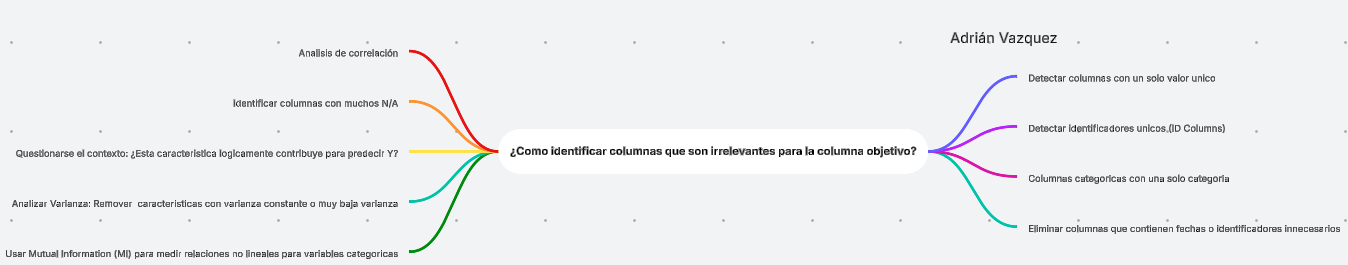

### Calcular la correlación entre las caracteristicas y la columna objetivo `EmpleadosAttrition`

### Años que el empleado lleva en la compañia
- Calcular con la fecha de contratación: `HiringDate`. A partir de ella extraer el año de contratación y crear una columna `Year` donde guardarlo
- Crear una columna `YearsAtCompany`: Contiene los años que el empleado lleva en la compañia hasta el año 2018 : Resta entre `Year ` - 2018 

In [9]:
EmpleadosAttrition['HiringDate']

0      06/06/2013
1      12/25/2015
2       2/14/2017
3       7/29/2010
4      10/07/2011
          ...    
395    05/09/2013
396    04/02/2016
397     1/21/2008
398     8/27/2018
399    02/08/2010
Name: HiringDate, Length: 400, dtype: object

In [10]:
# convertir HiringDate en datetime 
EmpleadosAttrition['HiringDate'] = pd.to_datetime(EmpleadosAttrition['HiringDate'], errors = 'coerce') 
# Extraer el año y agregarlo en la nuerva columna 'Year'
EmpleadosAttrition['Year'] = EmpleadosAttrition['HiringDate'].dt.year
# Columna YearsAtCompany: Los años que lleva en la compañia 
EmpleadosAttrition['YearsAtCompany'] = 2018 - EmpleadosAttrition['Year']
# transfomormarlo a int 
EmpleadosAttrition['YearsAtCompany'] =  EmpleadosAttrition['YearsAtCompany'].fillna(0).astype(int)
EmpleadosAttrition[['YearsAtCompany']]

,YearsAtCompany
0,5
1,3
2,1
3,8
4,7
...,...
395,5
396,2
397,10
398,0


###  Crear la variable `DistanceFromHome`: Proviene de `DistanceFromHome_KM` y es una variable entera  


In [11]:
# Renombrar DistanceFromHome a DistanceFromHome_KM
EmpleadosAttrition = EmpleadosAttrition.rename(columns = {'DistanceFromHome': 'DistanceFromHome_km'})
# Nueva variable DistanceFromHome sin 'KM' y tipo entero 
EmpleadosAttrition['DistanceFromHome'] = EmpleadosAttrition['DistanceFromHome_km'].str.replace('km', '', regex= False).astype(int)
EmpleadosAttrition['DistanceFromHome']
                                             

0       1
1       6
2       7
3       7
4      15
       ..
395    14
396    20
397    11
398     4
399    14
Name: DistanceFromHome, Length: 400, dtype: int32

### <b> Borrar </b> las columnas `Year`, `HiringDate` y `DistanceFromHome_km` debido a que ya no son útiles. 

In [12]:
EmpleadosAttrition.drop(['Year', 'HiringDate' , 'DistanceFromHome_km' ], axis = 1 , inplace = True)

### Nuevo DataFrame  `SueldoPromedioDepto` que contenga el `MonthlyIncome` promedio por departamento `Department` de los empleados y colocarlo en una variable llamada `SueldoPromedio`  

In [14]:
# Nuevo DF con el MonthlyIncome promedio por departamento
SueldoPromedioDepto = EmpleadosAttrition.groupby('Department', as_index = False)['MonthlyIncome'].mean()
# cambiar el nombre a la columna 
SueldoPromedioDepto.rename(columns = {'MonthlyIncome' : 'SueldoPromedio'}, inplace= True)
SueldoPromedioDepto.head()

,Department,SueldoPromedio
0,Human Resources,6239.888889
1,Research & Development,6804.149813
2,Sales,7188.250000


### Dentro de `EmpleadosAttrition` escalar la variable `MonthlyIncome` para que tenga valores entre 0 y 1 

#### <b> ¿Que metodo de escalado usar?  </b>

# Métodos de Escalado y Cuándo Usarlos

| **Método**             | **Fórmula**                                      | **Cuándo Usarlo**                                                             | **Sensible a Outliers** |
|------------------------|--------------------------------------------------|-------------------------------------------------------------------------------|-------------------------|
| **Min-Max Scaling**    | \( X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}} \)  | Útil cuando los datos tienen rangos bien definidos o distribuciones uniformes. Funciona bien en redes neuronales. | ✅ Sí |
| **StandardScaler (Z-Score)** | \( X' = \frac{X - \mu}{\sigma} \) | Ideal si la variable sigue una distribución normal o para modelos como regresión y PCA. | ❌ No |
| **RobustScaler**       | \( X' = \frac{X - \text{mediana}(X)}{\text{IQR}(X)} \) | Para datos con outliers, ya que usa la mediana en lugar de la media. | ❌ No |
| **Log Transform**      | \( X' = \log(X) \) | Cuando los datos tienen colas largas o distribuciones sesgadas (e.g., ingresos, precios de casas). | ❌ No |

## ¿Cómo Decidir?
- **Si los datos siguen una distribución normal** → Usa **StandardScaler**.
- **Si los datos están entre un rango fijo** (ejemplo: [0, 100]) → Usa **MinMaxScaler**.
- **Si hay outliers** → Usa **RobustScaler** o **log transform**.
- **Si usas un modelo basado en distancias** (KNN, SVM, PCA) → **Escalar es obligatorio**.
- **Si usas redes neuronales** → **MinMaxScaler** en el rango [0,1] o [-1,1] suele funcionar mejor.


In [16]:
# x_2